In [ ]:
# Created by: Jess Gallo
# Date Created: 08/11/2022
# Last Modified: 08/11/2022
# Description: Data Glacier Internship - G2M Insight for Cab Investment Firm

Right company for XYZ's investment

Hypotheses:
1) More males then females use cab services
2) People who are paid higher will use cabs more
3) More people from a bigger city, like NY will use cabs more
4) NY will have the least travel distance than the other cities
5) Which company has the better hold on the better market?


In [87]:
# libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Combining Datasets

Combining the cab, customer, and transaction datasets into one dataset. City datasets stays separated.

In [56]:
# details of transaction for 2 cab companies
filename = pd.read_csv(r"C:\Users\Gallo\Downloads\DataGlacier-CabData\Cab_Data.csv")
cab_df = pd.DataFrame(filename)

cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [30]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [31]:
cab_df.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


In [12]:
# list of US cities, their population and number of cab users
filename = pd.read_csv(r"C:\Users\Gallo\Downloads\DataGlacier-CabData\City.csv")
city_df = pd.DataFrame(filename)

city_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [14]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [23]:
city_df.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,NEW YORK NY,"8,405,837","302,149"
freq,1,1,1


In [5]:
# a mapping table that contains a unique identifier which links the customer’s demographic details
filename = pd.read_csv(r"C:\Users\Gallo\Downloads\DataGlacier-CabData\Customer_ID.csv")
customer_df = pd.DataFrame(filename)

customer_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [15]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [24]:
customer_df.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [57]:
# a mapping table that contains transaction to customer mapping and payment mode
filename = pd.read_csv(r"C:\Users\Gallo\Downloads\DataGlacier-CabData\Transaction_ID.csv")
transaction_df = pd.DataFrame(filename)

transaction_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [27]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [107]:
# Cab data and transaction data can be joined by their Transaction ID
cab_df2 = cab_df.join(transaction_df.set_index('Transaction ID'), on='Transaction ID', how='inner')
cab_df2.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


In [108]:
cab_df2.isnull().any()

Transaction ID    False
Date of Travel    False
Company           False
City              False
KM Travelled      False
Price Charged     False
Cost of Trip      False
Customer ID       False
Payment_Mode      False
dtype: bool

In [109]:
df = pd.merge(cab_df2, customer_df, on='Customer ID', how='inner')
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237


In [110]:
df = df.set_index('Transaction ID')
df.head()

,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
Transaction ID,,,,,,,,,,,
10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237


In [111]:
df.isnull().any()

Date of Travel        False
Company               False
City                  False
KM Travelled          False
Price Charged         False
Cost of Trip          False
Customer ID           False
Payment_Mode          False
Gender                False
Age                   False
Income (USD/Month)    False
dtype: bool

Parse Date of Travel column to convert to datetime format

In [115]:
start = pd.Timestamp('1899-12-30')
df['Date of Travel'] = pd.to_datetime(df['Date of Travel'], unit="D", origin = start)
df.head()

,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
Transaction ID,,,,,,,,,,,
10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237


In [128]:
df = df.sort_index()
df.head()

,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
Transaction ID,,,,,,,,,,,
10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813
10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237
10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242
10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327
10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 10000011 to 10440107
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date of Travel      359392 non-null  datetime64[ns]
 1   Company             359392 non-null  object        
 2   City                359392 non-null  object        
 3   KM Travelled        359392 non-null  float64       
 4   Price Charged       359392 non-null  float64       
 5   Cost of Trip        359392 non-null  float64       
 6   Customer ID         359392 non-null  int64         
 7   Payment_Mode        359392 non-null  object        
 8   Gender              359392 non-null  object        
 9   Age                 359392 non-null  int64         
 10  Income (USD/Month)  359392 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 32.9+ MB


Seperate out Day/Month/Year into seperate columns.

In [139]:
day = df['Date of Travel'].dt.day
day.head()

Transaction ID
10000011    8
10000012    6
10000013    2
10000014    7
10000015    3
Name: Date of Travel, dtype: int64

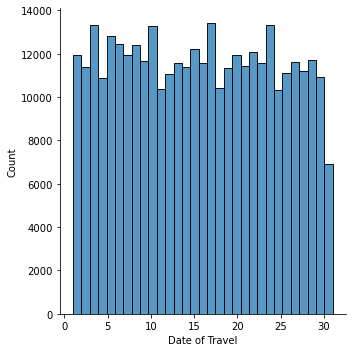

In [145]:
sns.displot(day, kde=False, bins=31)

In [134]:
month = df['Date of Travel'].dt.month
month.head()

Transaction ID
10000011    1
10000012    1
10000013    1
10000014    1
10000015    1
Name: Date of Travel, dtype: int64

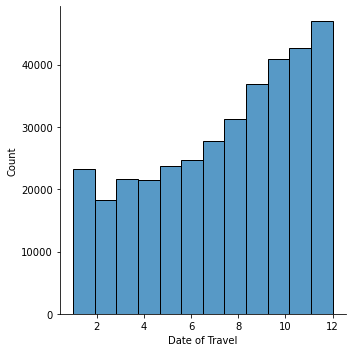

In [144]:
sns.displot(month, kde=False, bins=12)

In [135]:
year = df['Date of Travel'].dt.year
year.head()

Transaction ID
10000011    2016
10000012    2016
10000013    2016
10000014    2016
10000015    2016
Name: Date of Travel, dtype: int64

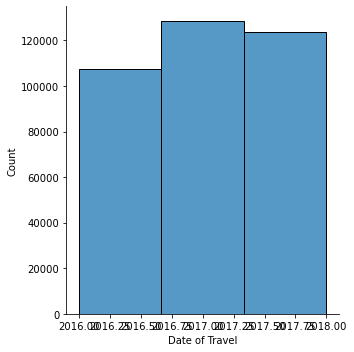

In [143]:
sns.displot(year, kde=False, bins=3)

Add year, month and day columns to dataset and drop datetime column

In [148]:
df['Year'] = year
df['Month'] = month
df['Day'] = day
df.head()

,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Year,Month,Day
Transaction ID,,,,,,,,,,,,,,
10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,2016,1,8
10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,2016,1,6
10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,2016,1,2
10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,2016,1,7
10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,2016,1,3


In [152]:
df.drop('Date of Travel', axis=1, inplace=True)

KeyError: "['Date of Travel'] not found in axis"

In [153]:
df.head()

,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Year,Month,Day
Transaction ID,,,,,,,,,,,,,
10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,2016,1,8
10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,2016,1,6
10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,2016,1,2
10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,2016,1,7
10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,2016,1,3


Drop CustomerID as this is not needed.

In [169]:
df.drop('Customer ID', axis=1, inplace=True)

In [170]:
df.head()

,Company,City,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month),Year,Month,Day
Transaction ID,,,,,,,,,,,,
10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Card,Male,28,10813,2016,1,8
10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Card,Male,27,9237,2016,1,6
10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Cash,Male,53,11242,2016,1,2
10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,Cash,Male,23,23327,2016,1,7
10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,Card,Male,33,8536,2016,1,3


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 10000011 to 10440107
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Company             359392 non-null  object 
 1   City                359392 non-null  object 
 2   KM Travelled        359392 non-null  float64
 3   Price Charged       359392 non-null  float64
 4   Cost of Trip        359392 non-null  float64
 5   Payment_Mode        359392 non-null  object 
 6   Gender              359392 non-null  object 
 7   Age                 359392 non-null  int64  
 8   Income (USD/Month)  359392 non-null  int64  
 9   Year                359392 non-null  int64  
 10  Month               359392 non-null  int64  
 11  Day                 359392 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 43.7+ MB


Save dataset to csv

In [217]:
df.to_csv('FinalCabData.csv')

In [171]:
#pink_profit = df['Price Charged'].sum()

grouped = df.groupby('Company').sum()
print(grouped)

            KM Travelled  Price Charged  Cost of Trip      Age  \
Company                                                          
Pink Cab      1911073.11   2.632825e+07  2.102092e+07  2992197   
Yellow Cab    6199417.47   1.258539e+08  8.183351e+07  9707532   

            Income (USD/Month)       Year    Month      Day  
Company                                                      
Pink Cab            1275666942  170866317   661465  1323495  
Yellow Cab          4132759631  554043591  2034131  4293244  


# Data Visualization

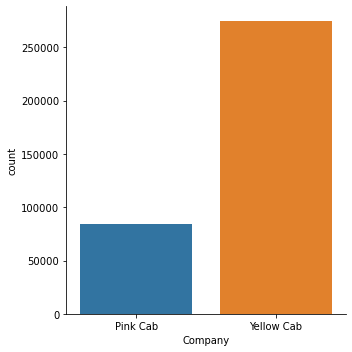

In [118]:
sns.catplot(x='Company', kind='count', data=df, legend=True)

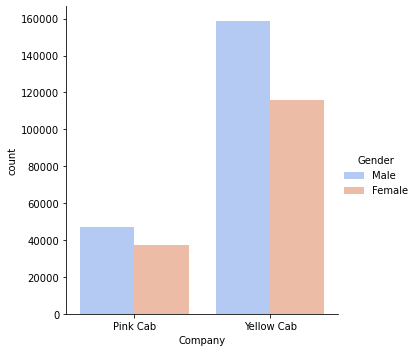

In [164]:
sns.catplot(x='Company', kind='count', hue='Gender', data=df, palette='coolwarm')

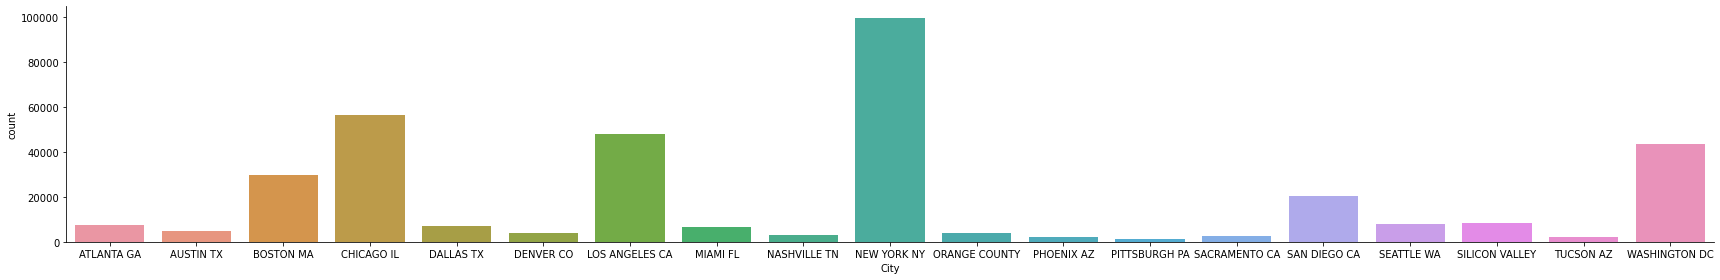

In [168]:
sns.catplot(data=df, x='City', kind='count', height=4, aspect=6)

I believe the highest prices for cabs will be in NYC and LA.

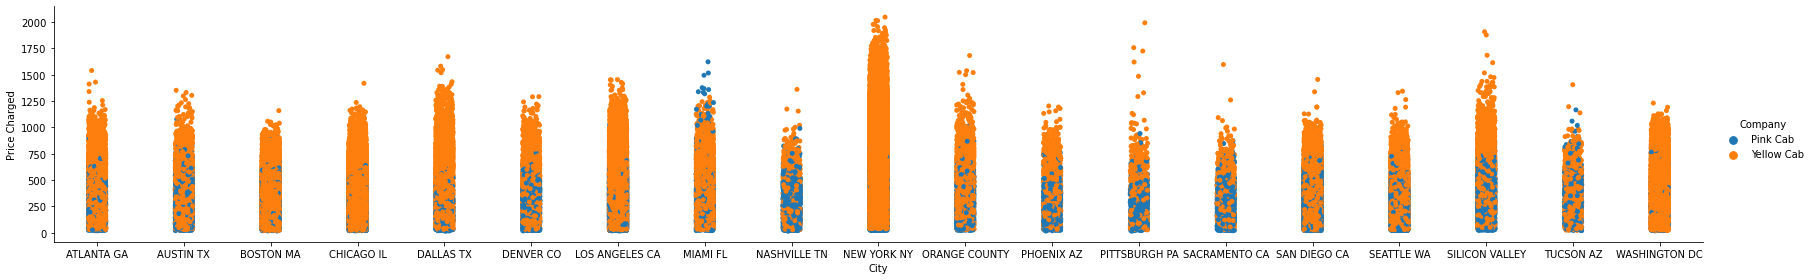

In [174]:
sns.catplot(data=df, x='City', y='Price Charged', hue='Company', height=4, aspect=6)

This plot proves that NYC would have the highest price charged, but LA is not the second highest price. Dallas has the next highest prices.

I believe that more young people would use cabs than older people.

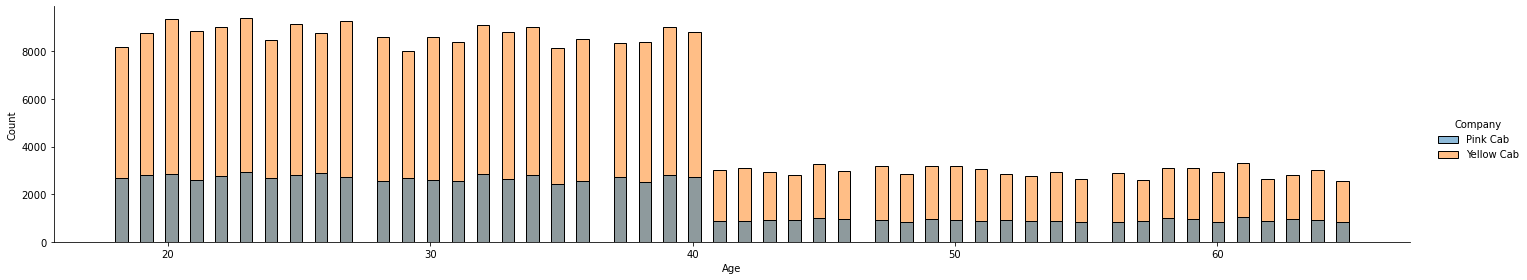

In [200]:
sns.displot(data=df, x='Age', kind='hist', hue='Company', height=4, aspect=5)

This proves my hypothesis that more younger people (specifically people under the age of 40) use both pink and yellow cabs.


I believe more cabs would be used during the winter months, while it's colder out.

<AxesSubplot:xlabel='Month', ylabel='KM Travelled'>

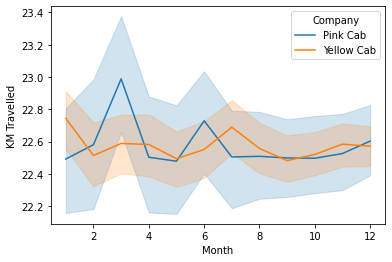

In [202]:
sns.lineplot(data=df, x='Month', y='KM Travelled', hue='Company')

This plot shows how much KM Travelled over the course of 3 years during the months. It disproves my hypothesis that cabs are mostly used during winter months. It shows that for the Pink Cab company, the months of March and June there is a spike in cab service. There are less people taking cabs during the summer and autumn months. 

<AxesSubplot:xlabel='Month', ylabel='KM Travelled'>

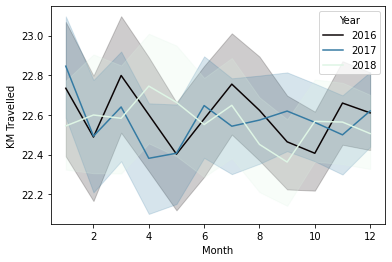

In [209]:
sns.lineplot(data=df, x='Month', y='KM Travelled', hue='Year', palette='mako')

I believe prices went up for both companies in 2018 compared to 2016

<AxesSubplot:xlabel='Year', ylabel='Price Charged'>

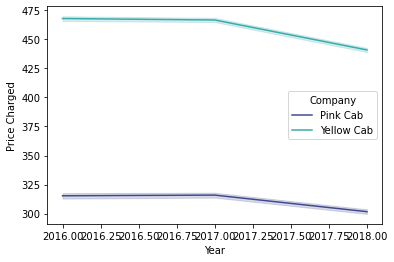

In [212]:
sns.lineplot(data=df, x='Year', y='Price Charged', hue='Company', palette='mako')

This plot disproves my hypothesis. Prices went down in 2018 compared to 2016.

I believe people with lower incomes will use cabs more often since people with higher incomes may take their own car and pay for parking or pay for a private vehicle

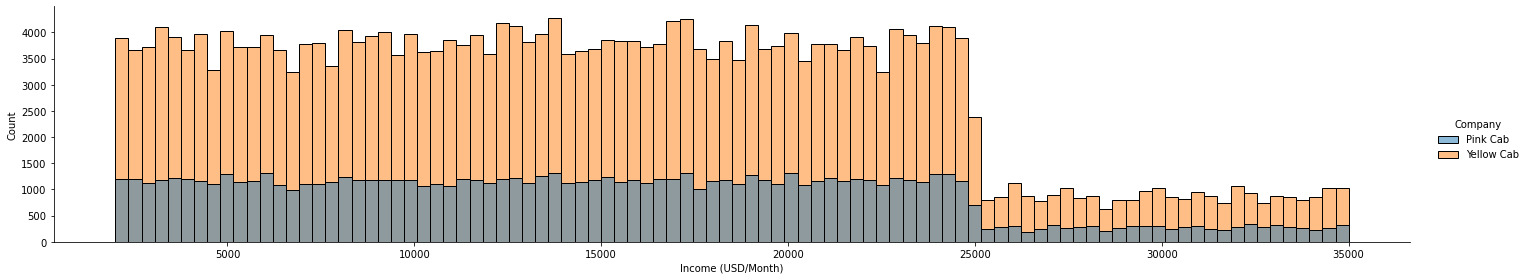

In [213]:
sns.displot(data=df, x='Income (USD/Month)', kind='hist', hue='Company', height=4, aspect=5)

This plot proves my hypothesis that people with lower incomes takes more cabs for both companies

I believe more people would take a cab at the end of the month.

<AxesSubplot:xlabel='Day', ylabel='KM Travelled'>

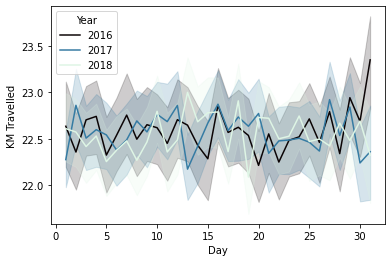

In [214]:
sns.lineplot(data=df, x='Day', y='KM Travelled', hue='Year', palette='mako')

This plot proves that more people took cabs at the end of the month in 2016, but that is not the case in 2018. In 2018, the amount of people taking cabs at the end of the month plummited. In 2018, the trend changed and more people were taking cabs in the middle of the month.

<AxesSubplot:xlabel='Day', ylabel='KM Travelled'>

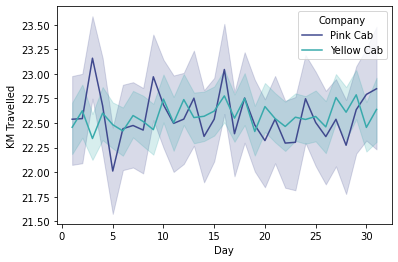

In [216]:
sns.lineplot(data=df, x='Day', y='KM Travelled', hue='Company', palette='mako')

Based on the results of the plots, my recommendation would be for Company XYZ to invest in the Yellow Cab company. The data shows that the Yellow Cab company has a larger hold on the cab market. There are more people, both male and female, in all different age ranges, using the Yellow Cab company. The Yellow Cab company is also used more widely accross the United States, especially in major cities like NYC, Dallas and LA. They charge lower prices than the Pink Cab company, but their profits are much larger overall. 